### 读入轮廓数据，预处理

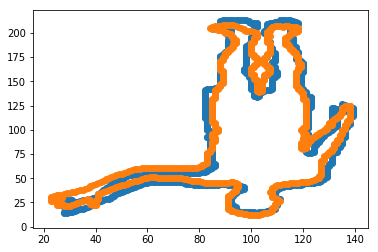

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
path = 'photo\p0\\'

data1 = np.load(path+'small_contours.npy')
data2 = np.load(path+'small_contours_smpl.npy')

len1 = len(data1)
len2 = len(data2) 

plt.scatter(data1[:,0], data1[:,1])
plt.scatter(data2[:,0], data2[:,1])
plt.show()

###  定义求解对应关系的函数

In [2]:
# 计算欧氏距离
def distance_2d(x1, y1, x2, y2):
    return np.sqrt(pow(x1-x2,2) + pow(y1-y2,2))

# 将矩阵处理为合适的list
def get_list(mat,start,end):
    if start>=0:
        mat = mat.tolist()[0][start:end]
    else:
        mat_len =mat.size
        mat = mat.tolist()[0]
        mat = mat[mat_len+start:mat_len]+mat[0:end]
    return mat

# 寻找并返回list中最小元素及其下标
def find_min(current,lis,k,len_n):
    #current 当前列的位置
    #lis 当前位置向前k位范围内的数组
    #len_n 每一行的长度
    
    if(current>=k):
        minV = min(lis)
        pos = lis.index(minV)
        return current-k+pos,minV
    else:
        minV = min(lis)
        pos = lis.index(minV)
        if(pos>=k-current):
            return current-k+pos,minV
        else:
            return len_n-k+current+pos,minV

### 动态求解点的关系

In [3]:
# 保存dp的值
dp_matrix_value = np.mat(np.zeros((len1,len2)))
#保存当前节点的父节点
dp_matrix_father = np.mat(np.zeros((len1,len2)))

# 初始化dp的值为无穷大
dp_matrix_value = dp_matrix_value+float('inf')
dp_matrix_father = dp_matrix_father-1 

for j in range(len2):
    dp_matrix_value[0,j] =  distance_2d(data1[0,0],data1[0,1],data2[j,0],data2[j,1])
    dp_matrix_father[0,j] =  j

    
k=32 #防跳跃系数 
for i in range(1,len1):
    for j in range(len2):
        before,min_value = find_min(j,get_list(dp_matrix_value[i-1,:],j-k,j+1),k,len2)
        dp_matrix_value[i,j] = min_value + distance_2d(data1[i,0],data1[i,1],data2[j,0],data2[j,1])
        
        dp_matrix_father[i,j] = before
    print(i,"/",len1)

1 / 845
2 / 845
3 / 845
4 / 845
5 / 845
6 / 845
7 / 845
8 / 845
9 / 845
10 / 845
11 / 845
12 / 845
13 / 845
14 / 845
15 / 845
16 / 845
17 / 845
18 / 845
19 / 845
20 / 845
21 / 845
22 / 845
23 / 845
24 / 845
25 / 845
26 / 845
27 / 845
28 / 845
29 / 845
30 / 845
31 / 845
32 / 845
33 / 845
34 / 845
35 / 845
36 / 845
37 / 845
38 / 845
39 / 845
40 / 845
41 / 845
42 / 845
43 / 845
44 / 845
45 / 845
46 / 845
47 / 845
48 / 845
49 / 845
50 / 845
51 / 845
52 / 845
53 / 845
54 / 845
55 / 845
56 / 845
57 / 845
58 / 845
59 / 845
60 / 845
61 / 845
62 / 845
63 / 845
64 / 845
65 / 845
66 / 845
67 / 845
68 / 845
69 / 845
70 / 845
71 / 845
72 / 845
73 / 845
74 / 845
75 / 845
76 / 845
77 / 845
78 / 845
79 / 845
80 / 845
81 / 845
82 / 845
83 / 845
84 / 845
85 / 845
86 / 845
87 / 845
88 / 845
89 / 845
90 / 845
91 / 845
92 / 845
93 / 845
94 / 845
95 / 845
96 / 845
97 / 845
98 / 845
99 / 845
100 / 845
101 / 845
102 / 845
103 / 845
104 / 845
105 / 845
106 / 845
107 / 845
108 / 845
109 / 845
110 / 845
111 / 84

835 / 845
836 / 845
837 / 845
838 / 845
839 / 845
840 / 845
841 / 845
842 / 845
843 / 845
844 / 845


### 输出并存储点对应关系

In [4]:
lis=[]

temp = dp_matrix_value[len1-1,:].tolist()[0]
minV = min(temp)
pos = temp.index(minV)
lis.append((len1-1,pos))
print(len1-1,"->",pos)

for i in range(len1-1):
    j = dp_matrix_father[len1-2-i,int(pos)]
    lis.append((len1-2-i,int(j)))
    print(len1-2-i,"->",int(j))
    pos = j
    
numpy_array = np.array(lis)
# np.save('corresponding_contours.npy',numpy_array )
np.save(path+'small_corresponding_contours.npy',numpy_array )
# corresponding_chonghe =np.load('E:/学习/大三/实训/第五周/corresponding_chonghe.npy')

844 -> 116
843 -> 115
842 -> 115
841 -> 115
840 -> 114
839 -> 102
838 -> 102
837 -> 102
836 -> 102
835 -> 102
834 -> 100
833 -> 99
832 -> 98
831 -> 97
830 -> 95
829 -> 95
828 -> 94
827 -> 93
826 -> 92
825 -> 87
824 -> 86
823 -> 85
822 -> 84
821 -> 83
820 -> 82
819 -> 81
818 -> 79
817 -> 79
816 -> 78
815 -> 77
814 -> 74
813 -> 74
812 -> 73
811 -> 73
810 -> 70
809 -> 66
808 -> 66
807 -> 66
806 -> 65
805 -> 64
804 -> 63
803 -> 62
802 -> 61
801 -> 60
800 -> 59
799 -> 56
798 -> 56
797 -> 53
796 -> 53
795 -> 53
794 -> 53
793 -> 52
792 -> 48
791 -> 48
790 -> 48
789 -> 48
788 -> 47
787 -> 46
786 -> 45
785 -> 44
784 -> 43
783 -> 42
782 -> 41
781 -> 40
780 -> 39
779 -> 39
778 -> 34
777 -> 33
776 -> 33
775 -> 33
774 -> 32
773 -> 32
772 -> 32
771 -> 29
770 -> 28
769 -> 27
768 -> 26
767 -> 25
766 -> 24
765 -> 24
764 -> 22
763 -> 21
762 -> 20
761 -> 19
760 -> 18
759 -> 17
758 -> 16
757 -> 15
756 -> 14
755 -> 13
754 -> 12
753 -> 11
752 -> 8
751 -> 6
750 -> 6
749 -> 5
748 -> 3
747 -> 3
746 -> 1
745 ->

48 -> 166
47 -> 163
46 -> 162
45 -> 159
44 -> 159
43 -> 159
42 -> 158
41 -> 157
40 -> 156
39 -> 156
38 -> 155
37 -> 152
36 -> 152
35 -> 152
34 -> 151
33 -> 151
32 -> 150
31 -> 149
30 -> 149
29 -> 149
28 -> 149
27 -> 146
26 -> 146
25 -> 132
24 -> 132
23 -> 124
22 -> 124
21 -> 124
20 -> 124
19 -> 124
18 -> 124
17 -> 124
16 -> 124
15 -> 119
14 -> 119
13 -> 119
12 -> 119
11 -> 118
10 -> 117
9 -> 117
8 -> 116
7 -> 115
6 -> 115
5 -> 115
4 -> 115
3 -> 115
2 -> 115
1 -> 115
0 -> 115


In [5]:
# lis =np.load('corresponding_contours.npy')
lis =np.load(path+'small_corresponding_contours.npy')
# data2 = np.load('G:/ipython工作空间/实训wakeup/small_contours_smpl.npy')#这个地方先待定

### 取出轮廓内部点

In [6]:
import cv2
import matplotlib.image as mpimg # mpimg 用于读取图片

#获取内部点，path为图片路径，
def getPointIn(path,outPoint):
    img =mpimg.imread(path)
    q=[]
    
    w,h,_=img.shape
    
    for i in range(h):
        for j in range(w):
            if cv2.pointPolygonTest(outPoint,(i,j),False)==1:
                q.append([i,j])
    return q

In [7]:
# im_path = 'kuli_mask.png'
im_path =path+ 's_p_mask.png'
list_in_contours  = getPointIn(im_path,data1)
len(list_in_contours)#73273
#17651

6369

In [8]:
for i in list_in_contours:
    print(i)

[28, 22]
[28, 23]
[29, 20]
[29, 21]
[29, 22]
[29, 23]
[29, 24]
[30, 20]
[30, 21]
[30, 22]
[30, 23]
[30, 24]
[30, 25]
[30, 26]
[31, 16]
[31, 19]
[31, 20]
[31, 21]
[31, 22]
[31, 23]
[31, 24]
[31, 25]
[32, 17]
[32, 18]
[32, 19]
[32, 20]
[32, 21]
[32, 22]
[32, 23]
[32, 24]
[33, 18]
[33, 19]
[33, 20]
[33, 21]
[33, 22]
[33, 23]
[33, 24]
[34, 19]
[34, 20]
[34, 21]
[34, 22]
[34, 23]
[34, 24]
[34, 25]
[35, 19]
[35, 20]
[35, 21]
[35, 22]
[35, 23]
[35, 24]
[35, 25]
[35, 26]
[36, 20]
[36, 21]
[36, 22]
[36, 23]
[36, 24]
[36, 25]
[36, 26]
[37, 21]
[37, 22]
[37, 23]
[37, 24]
[37, 25]
[37, 26]
[37, 27]
[38, 22]
[38, 23]
[38, 24]
[38, 25]
[38, 26]
[38, 27]
[38, 28]
[39, 23]
[39, 24]
[39, 25]
[39, 26]
[39, 27]
[39, 28]
[39, 29]
[40, 25]
[40, 26]
[40, 27]
[40, 28]
[40, 29]
[40, 30]
[41, 26]
[41, 27]
[41, 28]
[41, 29]
[41, 30]
[41, 31]
[42, 27]
[42, 28]
[42, 29]
[42, 30]
[42, 31]
[42, 32]
[42, 33]
[42, 34]
[43, 28]
[43, 29]
[43, 30]
[43, 31]
[43, 32]
[43, 33]
[43, 34]
[43, 35]
[43, 36]
[44, 29]
[44, 30]
[

[97, 31]
[97, 32]
[97, 33]
[97, 34]
[97, 35]
[97, 36]
[97, 37]
[97, 38]
[97, 42]
[97, 43]
[97, 44]
[97, 45]
[97, 46]
[97, 47]
[97, 48]
[97, 49]
[97, 50]
[97, 51]
[97, 52]
[97, 53]
[97, 54]
[97, 55]
[97, 56]
[97, 57]
[97, 58]
[97, 59]
[97, 60]
[97, 61]
[97, 62]
[97, 63]
[97, 64]
[97, 65]
[97, 66]
[97, 67]
[97, 68]
[97, 69]
[97, 70]
[97, 71]
[97, 72]
[97, 73]
[97, 74]
[97, 75]
[97, 76]
[97, 77]
[97, 78]
[97, 79]
[97, 80]
[97, 81]
[97, 82]
[97, 83]
[97, 84]
[97, 85]
[97, 86]
[97, 87]
[97, 88]
[97, 89]
[97, 90]
[97, 91]
[97, 92]
[97, 93]
[97, 94]
[97, 95]
[97, 96]
[97, 97]
[97, 98]
[97, 99]
[97, 100]
[97, 101]
[97, 102]
[97, 103]
[97, 104]
[97, 105]
[97, 106]
[97, 107]
[97, 108]
[97, 109]
[97, 110]
[97, 111]
[97, 112]
[97, 113]
[97, 114]
[97, 115]
[97, 116]
[97, 117]
[97, 118]
[97, 119]
[97, 120]
[97, 121]
[97, 122]
[97, 123]
[97, 124]
[97, 125]
[97, 126]
[97, 127]
[97, 128]
[97, 129]
[97, 130]
[97, 131]
[97, 132]
[97, 133]
[97, 134]
[97, 135]
[97, 136]
[97, 137]
[97, 138]
[97, 139]
[97, 1

[111, 47]
[111, 48]
[111, 49]
[111, 50]
[111, 51]
[111, 52]
[111, 53]
[111, 54]
[111, 55]
[111, 56]
[111, 57]
[111, 58]
[111, 59]
[111, 60]
[111, 61]
[111, 62]
[111, 63]
[111, 64]
[111, 65]
[111, 66]
[111, 67]
[111, 68]
[111, 69]
[111, 70]
[111, 71]
[111, 72]
[111, 73]
[111, 74]
[111, 75]
[111, 76]
[111, 77]
[111, 78]
[111, 79]
[111, 80]
[111, 81]
[111, 82]
[111, 83]
[111, 84]
[111, 85]
[111, 86]
[111, 87]
[111, 88]
[111, 89]
[111, 90]
[111, 91]
[111, 92]
[111, 93]
[111, 94]
[111, 95]
[111, 96]
[111, 97]
[111, 98]
[111, 99]
[111, 100]
[111, 101]
[111, 102]
[111, 103]
[111, 104]
[111, 105]
[111, 106]
[111, 107]
[111, 108]
[111, 109]
[111, 110]
[111, 111]
[111, 112]
[111, 113]
[111, 114]
[111, 115]
[111, 116]
[111, 117]
[111, 118]
[111, 119]
[111, 120]
[111, 121]
[111, 122]
[111, 123]
[111, 124]
[111, 125]
[111, 126]
[111, 127]
[111, 128]
[111, 129]
[111, 130]
[111, 131]
[111, 132]
[111, 133]
[111, 134]
[111, 135]
[111, 136]
[111, 137]
[111, 138]
[111, 139]
[111, 140]
[111, 141]
[111, 14

[136, 109]
[136, 110]
[136, 111]
[136, 112]
[136, 113]
[136, 114]
[136, 115]
[136, 116]
[136, 117]
[136, 118]
[136, 123]
[136, 124]
[136, 125]
[137, 106]
[137, 107]
[137, 108]
[137, 109]
[137, 110]
[137, 111]
[137, 112]
[137, 113]
[137, 114]
[137, 115]
[137, 116]
[137, 117]
[137, 118]
[137, 119]
[137, 120]
[137, 121]
[137, 122]
[137, 123]
[137, 124]
[138, 114]
[138, 115]
[138, 116]
[138, 117]
[138, 118]
[138, 119]
[138, 120]
[138, 121]
[138, 122]


### 求f(x)

In [9]:
# 求tanx/2
def getTan(x,y,z):
    a=np.array([x[0]-y[0],x[1]-y[1]])
    b=np.array([z[0]-y[0],z[1]-y[1]])
    sin =np.abs((a[0]*b[1]-a[1]*b[0])/(np.linalg.norm(a)*np.linalg.norm(b)))
    return  sin/(1+np.sqrt(1-sin*sin))

In [10]:
data2 = np.load(path+'small_contours_smpl.npy')

In [11]:

result=[]

for pos,j in enumerate(list_in_contours):
    tan=[] 
    for i in range(1,len(data1)):
        tan.append(getTan(data1[i-1],j,data1[i]))
    tan.append(getTan(data1[-1],j,data1[0]))
    w=[]
    sum=0
    for i in range(len(data1)):        
        w.append( (tan[i]+tan[i-1])/np.sqrt((data1[i][0]-j[0])*(data1[i][0]-j[0])+(data1[i][1]-j[1])*(data1[i][1]-j[1])))
        sum=sum+w[-1]
    w=w/sum

    a=0
    b=0
    for q in range(len(data1)):
        a=a+w[q]*data2[ (int)( lis[len1-1-q][1])  ][0]
        b=b+w[q]*data2[ (int)( lis[len1-1-q][1])  ][1]
    result.append((list_in_contours[pos],[int(a),int(b)]))
    
    if(pos%1000==0):
        print(pos,result[-1]) 


0 ([28, 22], [29, 22])
1000 ([89, 60], [86, 62])
2000 ([95, 91], [99, 90])
3000 ([101, 43], [97, 45])
4000 ([109, 28], [107, 30])
5000 ([114, 209], [111, 203])
6000 ([126, 60], [122, 62])


In [12]:
len(result)

6369

In [13]:
# 保存结果
result_np = np.array(result)
# np.save('corresponding_in.npy',result_np )
np.save(path+'small_corresponding_in.npy',result_np )

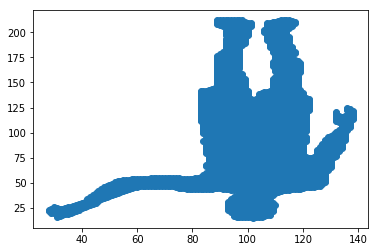

In [14]:
# 可视化对应的点
x_duiyinghou =result_np[:,0,0]
y_duiyinghou =result_np[:,0,1]

plt.scatter(x_duiyinghou, y_duiyinghou)
plt.show()